<div style="margin: 0 auto; text-align: center; width: 500px;">
    <h1><font color='#7985E0'>MID</font><font color='#F29496'> Pemrosesan Citra Digital</font></h1>
<div>

<div>
    <div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1Y2Qa88dTnR80uhwDQ-qyMc3wye9CcMdx" alt="foto" style="width:250px; height:250px"><br>
        <b>
            <font color="#7985E0">
                Iman Mustika Ismail<br>
                H071201050<br>
                Pemrosesan Citra Digital - B
            </font></b>
    </div>
</div>

## Library
---

In [167]:
# Importing library
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pylab as pylab
from PIL import Image, ImageEnhance
import imageio
import cv2
from skimage import img_as_ubyte
import scipy.ndimage as nd

## Nomor 1
---

1. Ubah ukuran citra **banana.jpg** menjadi setengah dari ukuran semula (300x450).

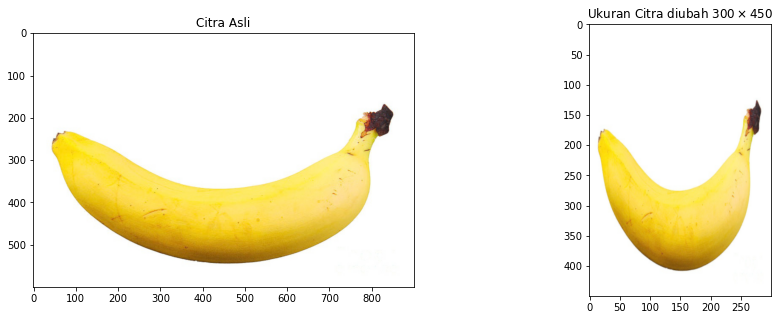

Sebelum (900, 600)
Sesudah (300, 450)


In [161]:
# Read image
img_banana = Image.open('banana.jpg')

# Resize banana.jpg to 300 x 450
img_banana_resize = img_banana.resize((300, 450), Image.BILINEAR)

# Displaying images
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img_banana, cmap='gray')
plt.title('Citra Asli')
plt.subplot(122)
plt.imshow(img_banana_resize, cmap='gray')
plt.title('Ukuran Citra diubah '+ r'$300 \times 450$')
plt.show()
print("Sebelum",img_banana.size)
print("Sesudah",img_banana_resize.size)

## Nomor 2
---

2. Tampilkan histogram citra **bird.jpg** untuk masing-masing komponen warna dalam satu grafik.

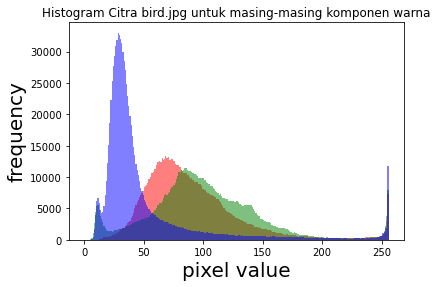

In [172]:
# Read image
img_bird = Image.open('bird.jpg')

# Create histogram function
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title)

# Displaying histogram
im_r, im_g, im_b= img_bird.split()
plot_hist(im_r, im_g, im_b, 'Histogram Citra bird.jpg untuk masing-masing komponen warna')
plt.show()

3. Gunakan perataan histogram untuk masing-masing komponen warna untuk memperbaiki kualitas citra **kabut.png**. Tampilkan histogramnya sebelum dan sesudah perataan untuk masing-masing komponen warna.

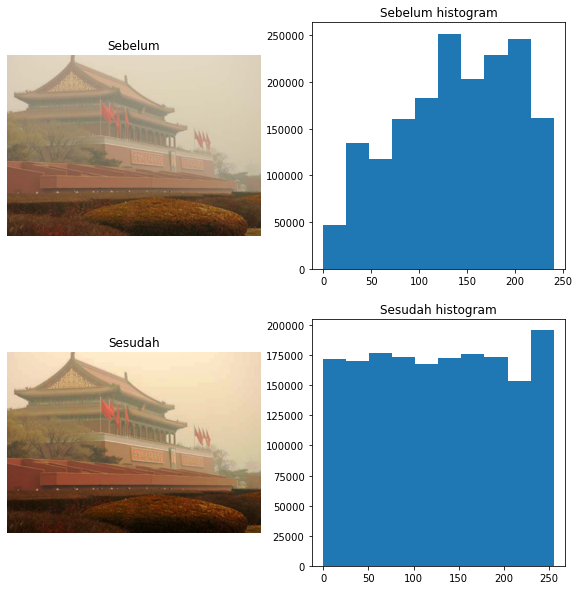

In [154]:
# Read image
img_kabut = imageio.imread('kabut.png')
hist, bins = np.histogram(img_kabut.flatten(),256,[0,256])

# Gives the cumulative value of hist
cdf = hist.cumsum()

# Normalization on image interval
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img_kabut_eq = cdf[img_kabut]

# Displaying images
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(img_kabut)
ax[0][0].axis('off')
ax[0][0].set_title("Sebelum")
ax[0][1].hist(img_kabut.flatten())
ax[0][1].set_title('Sebelum histogram')
ax[1][0].imshow(img_kabut_eq)
ax[1][0].axis('off')
ax[1][0].set_title("Sesudah")
ax[1][1].hist(img_kabut_eq.flatten())
ax[1][1].set_title('Sesudah histogram')
plt.show()

## Nomor 4

4. Proses gambar **banana.jpg** menggunakan highpass filter untuk menghasilkan output seperti pada gambar berikut:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


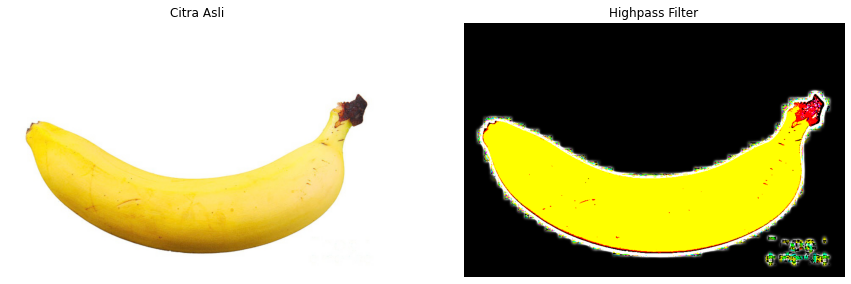

In [176]:
# Read image
img_banana = imageio.imread('banana.jpg')

# Highpass filter
data = np.array(img_banana, dtype=float)
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass

# Displaying images
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img_banana, cmap='gray')
plt.axis('off')
plt.title('Citra Asli')
plt.subplot(122)
plt.imshow(gauss_highpass, cmap='gray')
plt.axis('off')
plt.title('Highpass Filter')
plt.show()

## Nomor 5
---

5. Hilangkan noise pada citra **phone_noise.jpg** menggunakan average dan median filter.

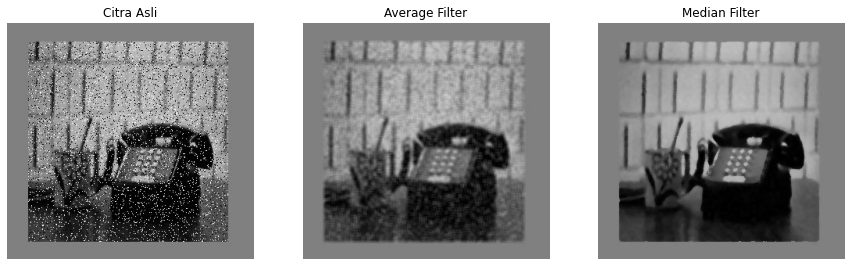

In [134]:
# Read image
img_phone = cv2.imread('phone_noise.jpg')

img_phone_average = cv2.blur(img_phone, (5,5))
img_phone_median = cv2.medianBlur(img_phone, 5)

# Displaying images
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(img_phone, cmap='gray')
plt.axis('off')
plt.title('Citra Asli')
plt.subplot(132)
plt.imshow(img_phone_average, cmap='gray')
plt.axis('off')
plt.title('Average Filter')
plt.subplot(133)
plt.imshow(img_phone_median, cmap='gray')
plt.axis('off')
plt.title('Median Filter')
plt.show()

## Nomor 6
---

6. Gunakan citra **burung.jpg** sebagai latar belakang citra banana.jpg seperti pada gambar berikut:

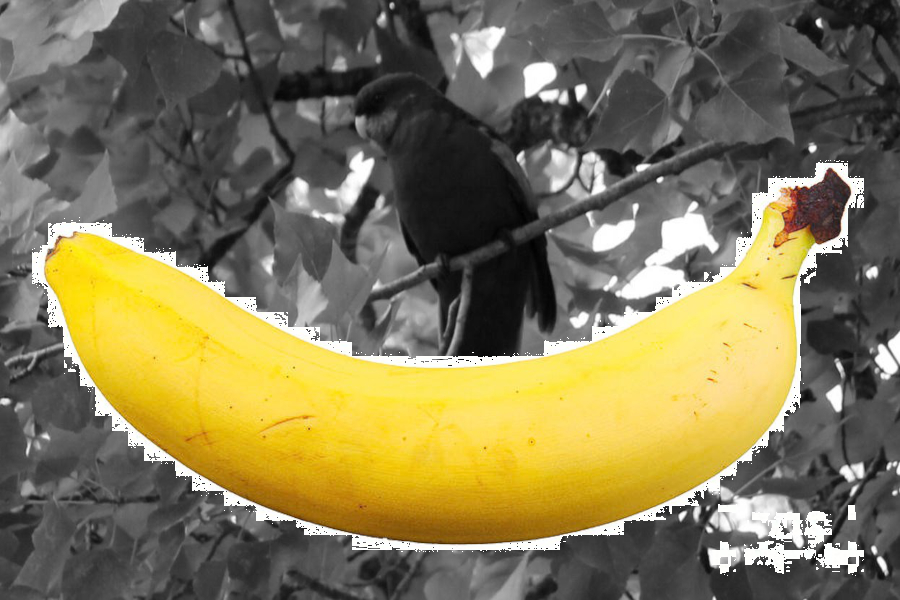

In [174]:
img_banana = Image.open("banana.jpg")
img_burung = Image.open("burung.jpg")

img_banana = img_banana.convert("RGBA")
img_burung = img_burung.convert("RGBA")

datas = img_banana.getdata()
newData = []

for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
    else:
            newData.append(item)
img_banana.putdata(newData)

img_burung_copy = img_burung.copy()
img_burung_copy.paste(img_banana, (0,0), img_banana)

display(img_burung_copy)